<a href="https://colab.research.google.com/github/FatimaElsaadny/Unsupervised-ML-Algos/blob/main/Unsupervised_ML_Algos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score

%matplotlib inline

# Define diffrent Clustering techniques methods

## 1- KMean method

In [ ]:

def plot_elbo(x, dis):
  #  print(silhouette)
   x = range(2, 10)
   plt.plot(x, dis, marker = 'o', color= 'r')
   plt.xlabel('Number of clusters')
   plt.ylabel('Value of distortion')
   plt.title("Elbo Graph")
   plt.show()
def plot_silhouette(x, silh):
   plt.plot(x, silh, marker = '^', color= 'b')
   plt.xlabel('Number of clusters')
   plt.ylabel('silhoutte value')
   plt.title("Silhouette Graph")
   plt.show()


def kmean_test(data):
  x = range(2, 10)
  distortion = []
  silhouette = []

  for i in  x:
    km = KMeans(n_clusters= i).fit(data)
    mlabels = km.predict(data)
    distortion.append(km.inertia_)
    silhouette.append(silhouette_score(data, mlabels))

  plot_elbo(x, distortion)
  plot_silhouette(x, silhouette)
  return  distortion, silhouette

 
def kmean_optimum(data, k):
  km = KMeans(n_clusters=k, random_state=0).fit(data)
  centroids = km.cluster_centers_
  label = km.labels_
  u_labels = np.unique(label)
  
  #plotting the results:
  
  plt.scatter(data.x, data.y, c=label, s=40, cmap='viridis')
 
  plt.legend()
  # plt.show()
  # for i in u_labels:
  #     plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  # plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
  # plt.legend()
  # plt.show()

  return 'silhouette_score for kmean = ' + str(silhouette_score(data, label))

## 2- Hirerical Clustering

In [ ]:
def agglomrative_test(data):
  X =  range(2,9)
  silhouette = []
  for n in X:
    agg = AgglomerativeClustering(n_clusters= n).fit(data)
    lab = agg.labels_

    silhouette.append(silhouette_score(data, lab))
  plt.plot(X, silhouette, marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('Silhouette Score')
  plt.title("Number of Clusters Vs Silhouette Score")
  plt.show()
 
def agglomrative_optimum(data, nmin):
   agg = AgglomerativeClustering(n_clusters= nmin).fit(data)
   labels = agg.labels_
   
   plt.scatter(data.x, data.y, c=labels, s=40, cmap='viridis')
   plt.title('Agglomrative Clustering')
   plt.show()
   return 'silhouette_score for Agglomrative = ' + str(silhouette_score(data, labels))

## 3- DBSCAN method

In [ ]:
def dbscan_test(data):

  eps_list=np.arange(start=0.1, stop=0.9, step=0.01)
  min_sample_list=np.arange(start=2, stop=5, step=1)
  silhouette_scores_data=pd.DataFrame()
  silhouette_eps=[]
  silhouette_sample=[]

  for eps in eps_list:
    for min_sample_trial in min_sample_list:
      dbscan = DBSCAN(eps=eps, min_samples=min_sample_trial).fit(data)
      labels=dbscan.labels_
      # print(silhouette_score(data, labels))
      if(len(np.unique(labels))>1):

        s=silhouette_score(data, labels)

        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[s,eps,min_sample_trial]], columns=["score", "eps","Min_sample"]))

  # plot_silhouette(silhouette_scores_data['eps'], silhouette_scores_data['score'])
  # plot_silhouette(silhouette_scores_data['Min_sample'], silhouette_scores_data['score'])
  
  return silhouette_scores_data.sort_values(by='score', ascending=False).head(1)

def dbscan_optimum(data, eps, nmin):
   dbscan = DBSCAN(eps= eps, min_samples= nmin).fit(data)
   labels = dbscan.labels_

   plt.scatter(data.x, data.y, c=labels, s=40, cmap='viridis')
   plt.title('DBSCAN Clustering')
   plt.show()

   return 'silhouette_score for DBSCAN = ' + str(silhouette_score(data, labels))

## GMM

In [ ]:
def gmm_test(data):
  X = range(2,10)
  silhoute_scores = []
  for n in X:

    gm = GaussianMixture(n_components= n).fit(data)
    sScore = silhouette_score(data, gm.predict(data))
    silhoute_scores.append(sScore)

  plot_silhouette(X, silhoute_scores)
 
  return silhoute_scores

def gmm_optimum(data, n):
  gm = GaussianMixture(n_components= n).fit(data)
  #predictions from gmm
  labels = gm.predict(data)
 
  plt.scatter(data.x, data.y, c=labels, s=40, cmap='viridis')
  plt.legend()
  plt.show()

  return 'silhouette_score for GMM = ' + str(silhouette_score(data, labels))



Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


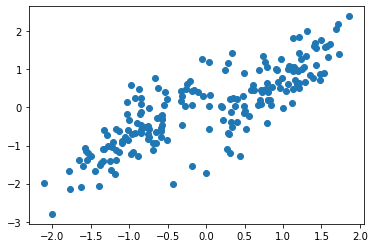

In [ ]:
plt.scatter(d1['x'], d1['y'])
plt.show()

# KMean for d1

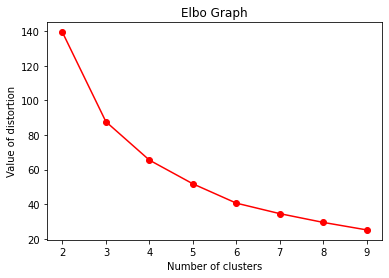

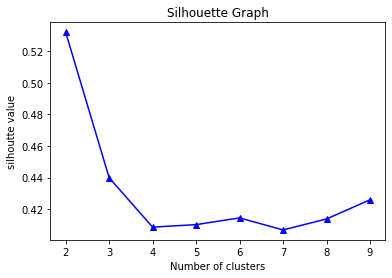

([139.4265712399618,
  87.70371264128524,
  65.48986755625789,
  51.77406375535079,
  40.59699531958201,
  34.52270543816889,
  29.453546094568434,
  25.115761651175262],
 [0.5319247935472973,
  0.43992489383941363,
  0.40870500030370466,
  0.41030515793938377,
  0.41453263327940165,
  0.40695291324531696,
  0.4138635290139973,
  0.4260131297486039])

In [ ]:
kmean_test(d1)

No handles with labels found to put in legend.


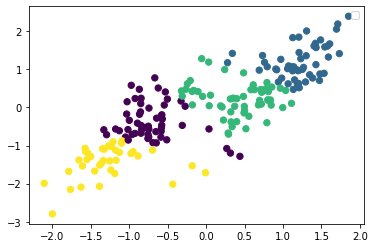

In [ ]:
km_silh= kmean_optimum(d1, 4)

# DBSCAN for d1

In [ ]:
dbscan_test(d1)

,score,eps,Min_sample
0,0.430206,0.68,4


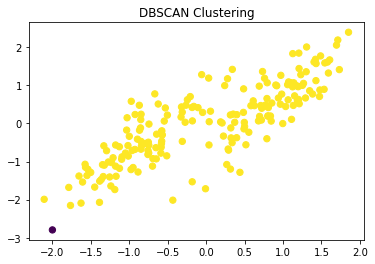

'silhouette_score for DBSCAN = 0.4302058142211662'

In [ ]:
dbscan_silh = dbscan_optimum(d1, 0.68, 4)
dbscan_silh

# Agglomrative for d1

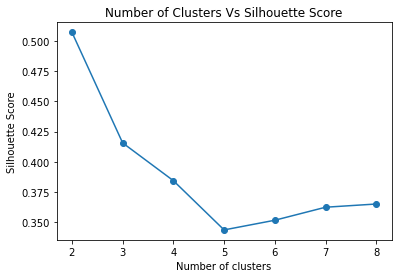

In [ ]:
agglomrative_test(d1)

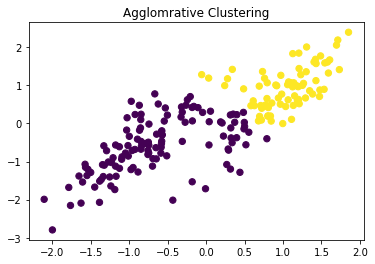

'silhouette_score for Agglomrative = 0.5072921620254586'

In [ ]:
agg_silh = agglomrative_optimum(d1, 2)
agg_silh

# GMM for d1

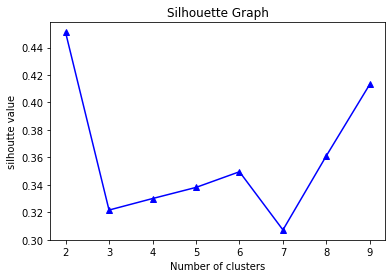

[0.45114087997192326,
 0.3216422453916751,
 0.33002142339809337,
 0.3381305620495263,
 0.34954043224010833,
 0.30718064812573975,
 0.3612471211644433,
 0.41338069860850807]

In [ ]:
gmm_test(d1)

No handles with labels found to put in legend.


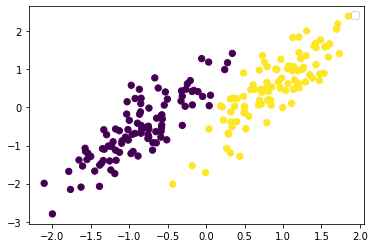

'silhouette_score for GMM = 0.45114087997192326'

In [ ]:
gmm_silh = gmm_optimum(d1, 2)
gmm_silh

## Score sammary for d1

In [ ]:
print(km_silh)
print(agg_silh)
print(dbscan_silh)
print(gmm_silh)


silhouette_score for kmean = 0.3978628038659111
silhouette_score for Agglomrative = 0.5072921620254586
silhouette_score for DBSCAN = 0.4302058142211662
silhouette_score for GMM = 0.45114087997192326




---

\:

---
****************************************************************************************


---



## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2


,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589
...,...,...
295,-0.522015,1.682249
296,-0.195039,1.177602
297,0.004994,1.111269
298,-1.954443,0.506557


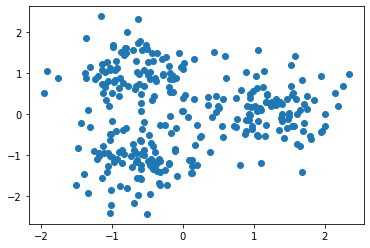

In [ ]:
plt.scatter(d2['x'], d2['y'])
plt.show()

# KMean for d2

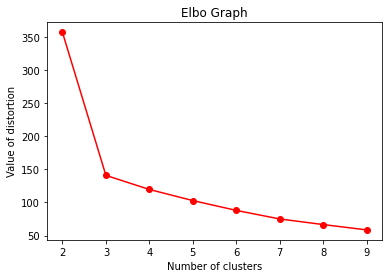

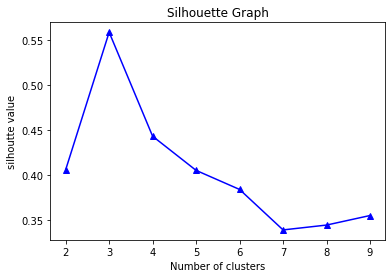

([357.5190453349867,
  140.94737361747366,
  119.63805530211125,
  102.82911564671369,
  87.97523091996027,
  75.01009665164955,
  66.52574525419897,
  58.45415763177682],
 [0.40580950901028096,
  0.5583157663135309,
  0.4429476175668253,
  0.40508398832428616,
  0.38394041764784537,
  0.33906208290608314,
  0.34444307199036406,
  0.3550320293164002])

In [ ]:
kmean_test(d2)

No handles with labels found to put in legend.


'silhouette_score for kmean = 0.5583157663135309'

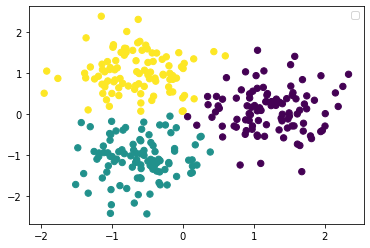

In [ ]:
km_score = kmean_optimum(d2, 3)
km_score

# Agglomrative for d2

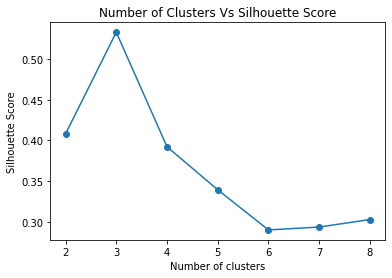

In [ ]:
agglomrative_test(d2)

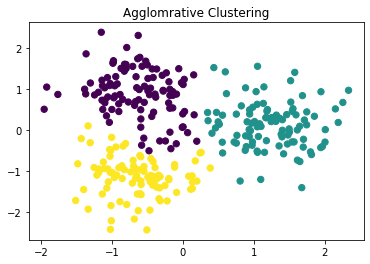

'silhouette_score for Agglomrative = 0.5331004784160976'

In [ ]:
agg_score = agglomrative_optimum(d2, 3)
agg_score

# DBSCAN for d2

In [ ]:
dbscan_test(d2)

,score,eps,Min_sample
0,0.245094,0.33,4


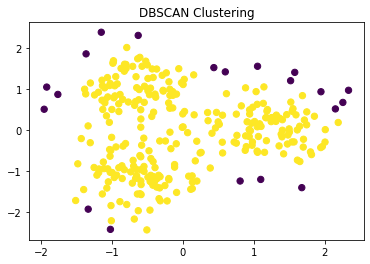

'silhouette_score for DBSCAN = 0.24509368326249975'

In [ ]:
dbscan_score = dbscan_optimum(d2, 0.33, 4)
dbscan_score

# GMM for d2

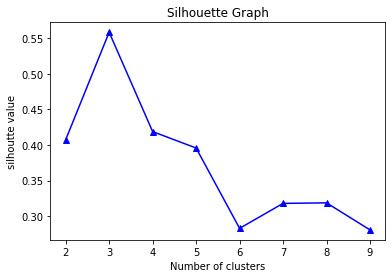

[0.407283084353969,
 0.5583157663135309,
 0.4187927695539401,
 0.395736475712532,
 0.28293643072705216,
 0.31800879379576946,
 0.318729446881319,
 0.28074786245852273]

In [ ]:
gmm_test(d2)

No handles with labels found to put in legend.


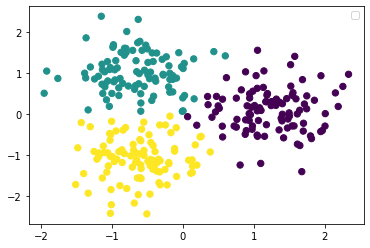

'silhouette_score for GMM = 0.5583157663135309'

In [ ]:
gmm_score = gmm_optimum(d2,3)
gmm_score

## Score sammary for **d2**

In [ ]:
print(km_score)
print(agg_score)
print(dbscan_score)
print(gmm_score)


silhouette_score for kmean = 0.5583157663135309
silhouette_score for Agglomrative = 0.5331004784160976
silhouette_score for DBSCAN = 0.24509368326249975
silhouette_score for GMM = 0.5583157663135309


## Dataset 3

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

d3.head(5)

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920


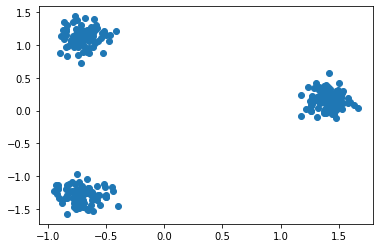

In [ ]:
plt.scatter(d3['x'], d3['y'])
plt.show()

# KMean for d3

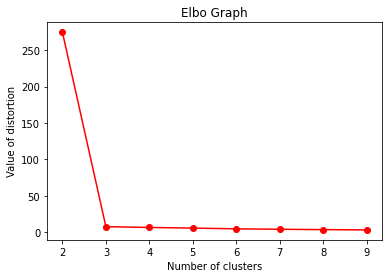

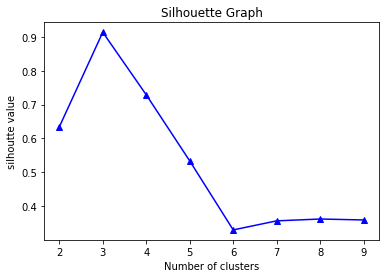

([274.4380729399377,
  7.759654764030211,
  6.6416619196530196,
  5.780963302432996,
  4.7709982147593974,
  4.162024572285228,
  3.685455871862059,
  3.280179230643949],
 [0.6338653993876051,
  0.913619050733588,
  0.7287257650919613,
  0.5334308148874318,
  0.32964065610209226,
  0.3564124924340606,
  0.3618510225927851,
  0.3590277325666935])

In [ ]:
kmean_test(d3)

No handles with labels found to put in legend.


'silhouette_score for kmean = 0.913619050733588'

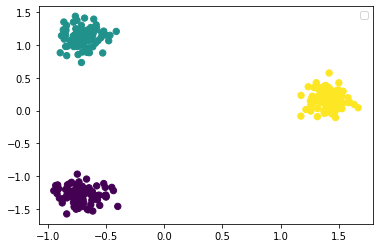

In [ ]:
km_score = kmean_optimum(d3,3)
km_score

## Agglomrative for d3

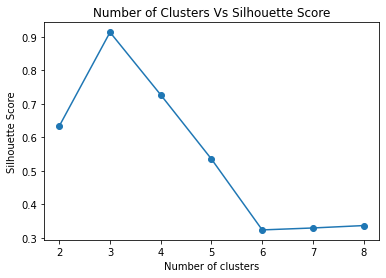

In [ ]:
agglomrative_test(d3)

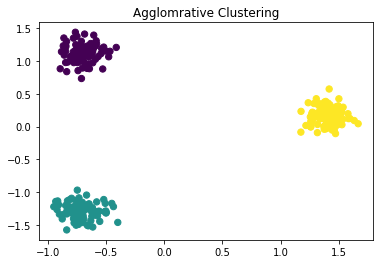

'silhouette_score for Agglomrative = 0.913619050733588'

In [ ]:
agg_score = agglomrative_optimum(d3, 3)
agg_score

# DBSCAN for d3

In [ ]:
dbscan_test(d3)

,score,eps,Min_sample
0,0.913619,0.5,2


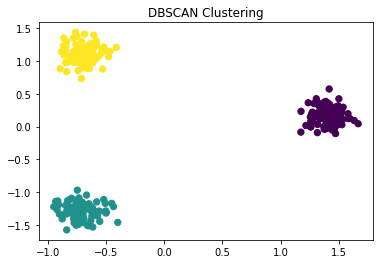

'silhouette_score for DBSCAN = 0.913619050733588'

In [ ]:
dbscan_score = dbscan_optimum(d3, 0.5, 2)
dbscan_score

# GMM for d3

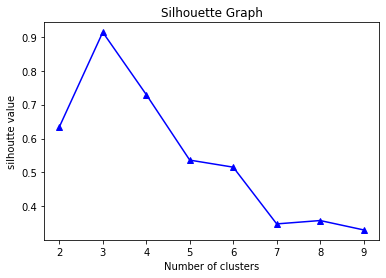

[0.6338653993876051,
 0.913619050733588,
 0.729687118072792,
 0.5362792558333725,
 0.5154350260921567,
 0.3479885085249385,
 0.3579105499385045,
 0.3302457103439059]

In [ ]:
gmm_test(d3)

No handles with labels found to put in legend.


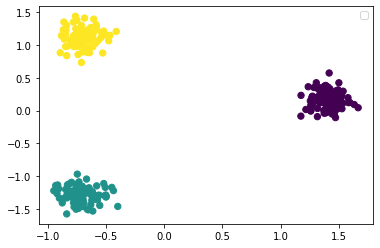

'silhouette_score for GMM = 0.913619050733588'

In [ ]:
gmm_score = gmm_optimum(d3,3)
gmm_score

## Score sammary for **d3**

In [ ]:
print(km_score)
print(agg_score)
print(dbscan_score)
print(gmm_score)


silhouette_score for kmean = 0.5861497443577425
silhouette_score for Agglomrative = 0.5228726587928135
silhouette_score for DBSCAN = 0.913619050733588
silhouette_score for GMM = 0.5697616522341273


## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4.head(5)

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615


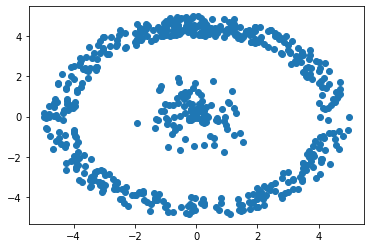

In [ ]:
plt.scatter(d4['x'], d4['y'])
plt.show()

# KMean for d4

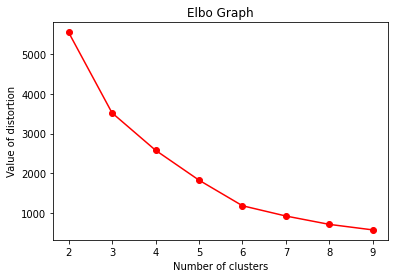

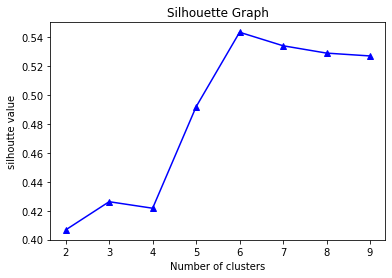

([5539.556314016852,
  3518.7507282625047,
  2582.1261846036014,
  1832.3002728316055,
  1190.2356607933762,
  932.4059266023157,
  722.9444751233768,
  584.5906057573651],
 [0.40672720405579144,
  0.42625172531632366,
  0.42173298398880843,
  0.4919251797596594,
  0.5435028641729902,
  0.5341461391804169,
  0.5290676242610398,
  0.527099199847531])

In [ ]:
kmean_test(d4)

No handles with labels found to put in legend.


'silhouette_score for kmean = 0.42953435475593854'

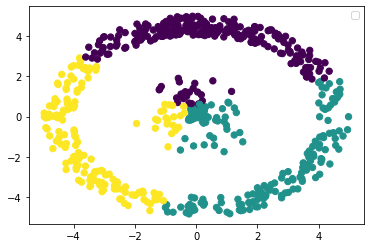

In [ ]:
km_score = kmean_optimum(d4,3)
km_score

## Agglomrative for d4

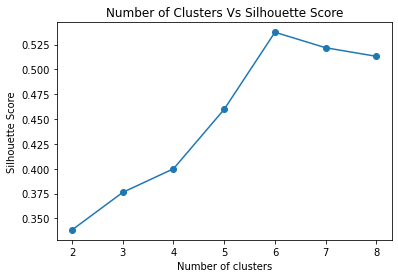

In [ ]:
agglomrative_test(d4)

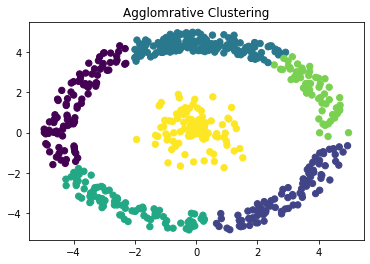

'silhouette_score for Agglomrative = 0.5374567295884447'

In [ ]:
agg_score = agglomrative_optimum(d4, 6)
agg_score

# DBSCAN for d4

In [ ]:
dbscan_test(d4)

,score,eps,Min_sample
0,0.313196,0.43,4


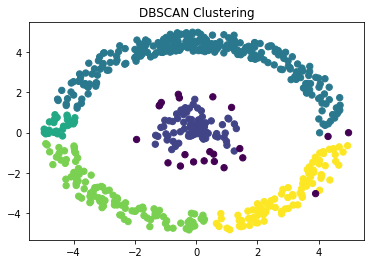

'silhouette_score for DBSCAN = 0.3131957344159664'

In [ ]:
dbscan_score = dbscan_optimum(d4, 0.43, 4)
dbscan_score

# GMM for d4

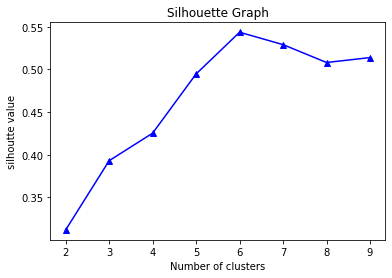

[0.311827952782311,
 0.3929877307763252,
 0.425246290592949,
 0.49469868216464713,
 0.5435650848430928,
 0.529038728599609,
 0.5080924649078072,
 0.5138471700047925]

In [ ]:
gmm_test(d4)

No handles with labels found to put in legend.


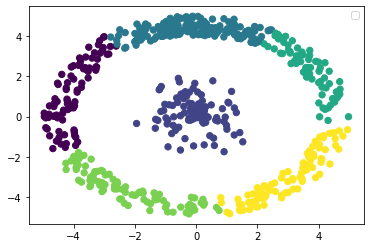

'silhouette_score for GMM = 0.5435650848430928'

In [ ]:
gmm_score = gmm_optimum(d4,6)
gmm_score

## Score sammary for **d4**

In [ ]:
print(km_score)
print(agg_score)
print(dbscan_score)
print(gmm_score)


silhouette_score for kmean = 0.42953435475593854
silhouette_score for Agglomrative = 0.5374567295884447
silhouette_score for DBSCAN = 0.3131957344159664
silhouette_score for GMM = 0.5435650848430928


### Compare

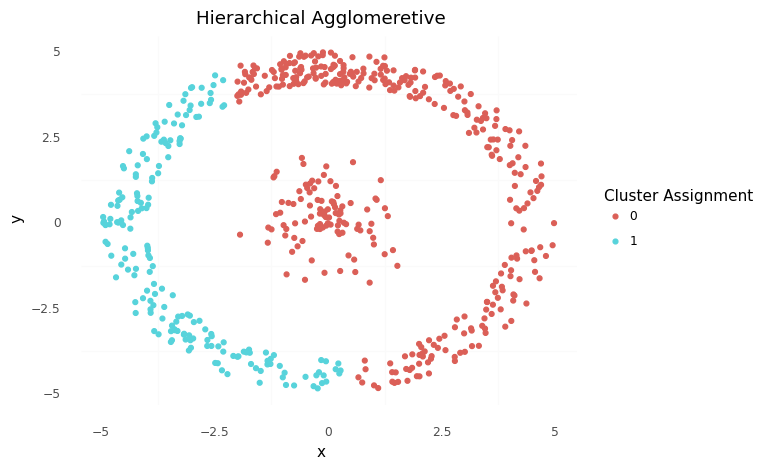

<ggplot: (8761781009157)>


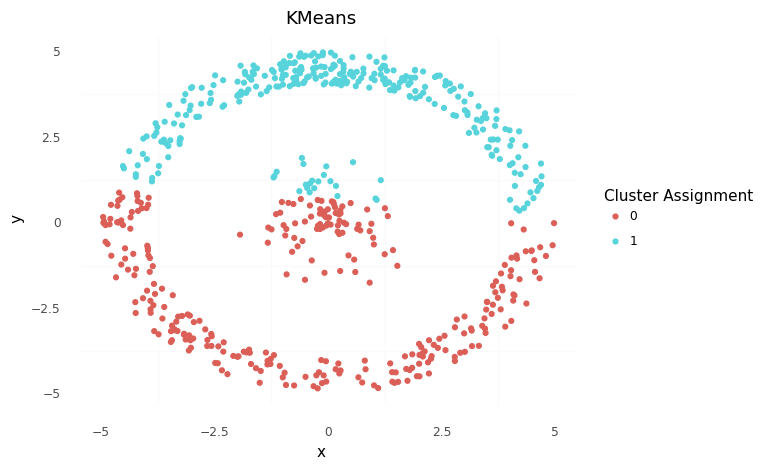

<ggplot: (8761780977521)>


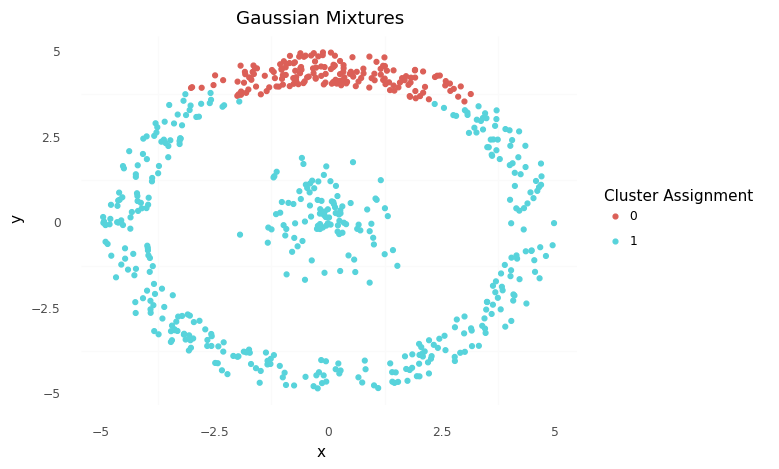

<ggplot: (8761780193501)>


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head(5)

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


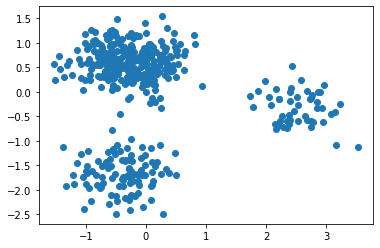

In [ ]:
plt.scatter(d5['x'], d5['y'])
plt.show()

# KMean for d5

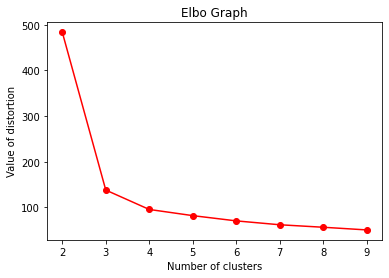

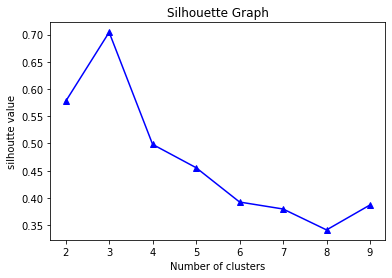

([483.5648353571165,
  138.09226814915655,
  95.63452882481673,
  82.12542011516074,
  70.63499223472317,
  62.12860360139922,
  56.68483696833523,
  50.84990433653442],
 [0.5773782376444128,
  0.7043537508086658,
  0.49827756256383826,
  0.45545541823483227,
  0.3923675462598417,
  0.3795520822201316,
  0.3411220382024215,
  0.3869944789091292])

In [ ]:
kmean_test(d5)

No handles with labels found to put in legend.


'silhouette_score for kmean = 0.7043537508086658'

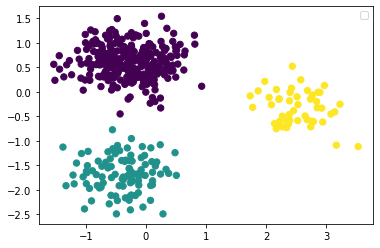

In [ ]:
km_score = kmean_optimum(d5,3)
km_score

## Agglomrative for d5

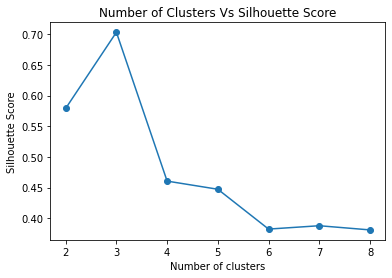

In [ ]:
agglomrative_test(d5)

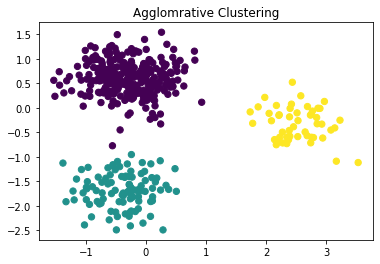

'silhouette_score for Agglomrative = 0.7031189213721806'

In [ ]:
agg_score = agglomrative_optimum(d5, 3)
agg_score

# DBSCAN for d5

In [ ]:
dbscan_test(d5)

,score,eps,Min_sample
0,0.681751,0.34,4


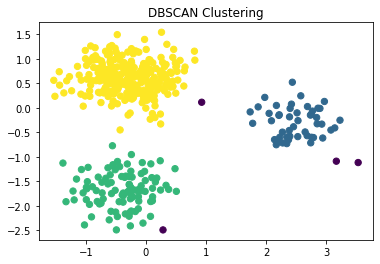

'silhouette_score for DBSCAN = 0.6817508781301118'

In [ ]:
dbscan_score = dbscan_optimum(d5, 0.34, 4)
dbscan_score

# GMM for d5

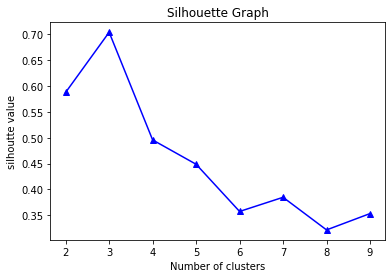

[0.588003566940651,
 0.7043537508086658,
 0.4959141869709761,
 0.44881086353775784,
 0.3574725850128781,
 0.3848829941722579,
 0.3217490494317647,
 0.3533859796134088]

In [ ]:
gmm_test(d5)

No handles with labels found to put in legend.


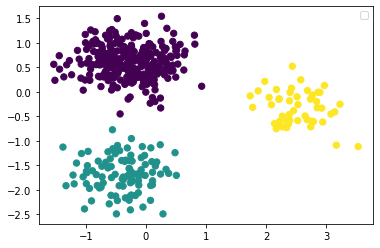

'silhouette_score for GMM = 0.7043537508086658'

In [ ]:
gmm_score = gmm_optimum(d5,3)
gmm_score

## Score sammary for **d5**

In [ ]:
print(km_score)
print(agg_score)
print(dbscan_score)
print(gmm_score)


silhouette_score for kmean = 0.7043537508086658
silhouette_score for Agglomrative = 0.7031189213721806
silhouette_score for DBSCAN = 0.6817508781301118
silhouette_score for GMM = 0.7043537508086658


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459
...,...,...
295,-0.530407,1.218364
296,-1.096856,-1.173641
297,-0.805383,-0.112308
298,-1.849885,1.529973


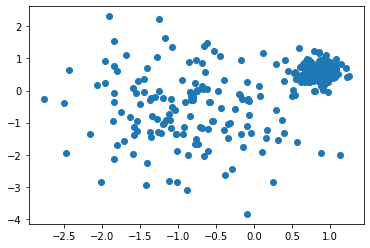

In [ ]:
plt.scatter(d6['x'], d6['y'])
plt.show()

# KMean for d6

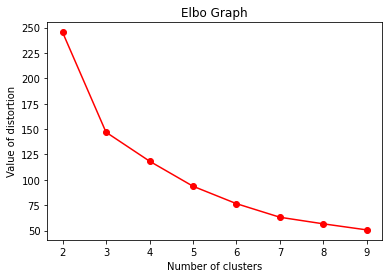

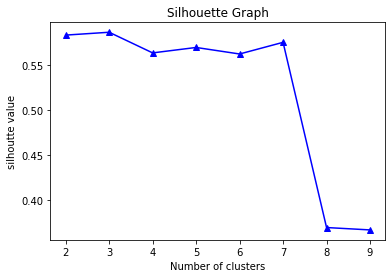

([245.45139384642772,
  146.91828825139729,
  118.40417826754222,
  93.68633173451305,
  76.49431869218628,
  63.09865625391289,
  56.602225649021875,
  50.62484423496107],
 [0.5829742988895883,
  0.5861497443577425,
  0.563215512000971,
  0.5692457430046274,
  0.562003689444576,
  0.5749495573148965,
  0.3692844185018507,
  0.3666475679376534])

In [ ]:
kmean_test(d6)

No handles with labels found to put in legend.


'silhouette_score for kmean = 0.5861497443577425'

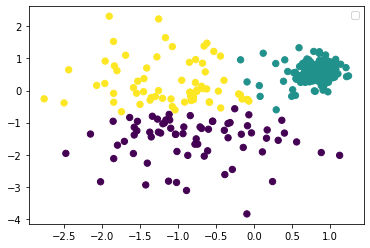

In [ ]:
km_score = kmean_optimum(d6,3)
km_score

## Agglomrative for d6

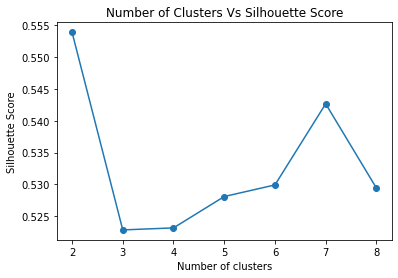

In [ ]:
agglomrative_test(d6)

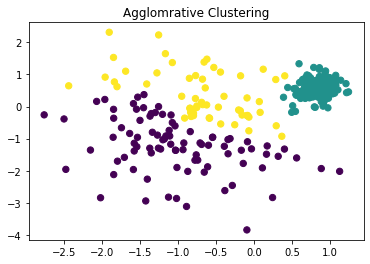

'silhouette_score for Agglomrative = 0.5228726587928135'

In [ ]:
agg_score = agglomrative_optimum(d6, 3)
agg_score

# DBSCAN for d6

In [ ]:
dbscan_test(d6)

,score,eps,Min_sample
0,0.53584,0.89,4


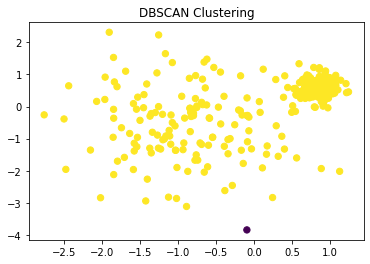

'silhouette_score for DBSCAN = 0.5358400753998106'

In [ ]:
dbscan_score = dbscan_optimum(d6, 0.89, 4)
dbscan_score

# GMM for d6

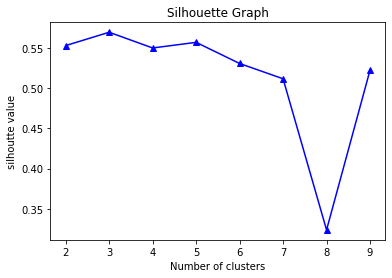

[0.5531426830972708,
 0.5697616522341273,
 0.5501827238704093,
 0.5571835993761567,
 0.5308782318738839,
 0.5118460913581748,
 0.3237318126062958,
 0.5225698242145063]

In [ ]:
gmm_test(d6)

No handles with labels found to put in legend.


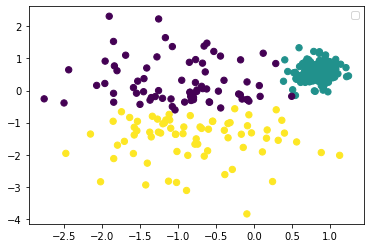

'silhouette_score for GMM = 0.5697616522341273'

In [ ]:
gmm_score = gmm_optimum(d6,3)
gmm_score

## Score sammary for **d2**

In [ ]:
print(km_score)
print(agg_score)
print(dbscan_score)
print(gmm_score)


silhouette_score for kmean = 0.5861497443577425
silhouette_score for Agglomrative = 0.5228726587928135
silhouette_score for DBSCAN = 0.5358400753998106
silhouette_score for GMM = 0.5697616522341273
